## Draw Figure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cfdata = pd.read_csv('data/processed_fidelity.csv')

In [2]:
cfdata

layer            pp      shots     fqram
0        2  1.000000e-02    1000000  0.446062
1        3  1.000000e-02    1000000  0.166102
2        4  1.000000e-02    1000000  0.060095
3        5  1.000000e-02    1000000  0.023130
4        6  1.000000e-02    1000000  0.009860
..     ...           ...        ...       ...
107      8  1.000000e-06    5000000  0.995339
108      8  5.000000e-07    5000000  0.997672
109      8  1.000000e-07   10000000  0.999535
110      8  5.000000e-08  100000000  0.999764
111      8  1.000000e-08  500000000  0.999953

[112 rows x 4 columns]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
fontsize = 55
colors = ['#7895C1','#5CA7C7','#383838','#D4352D','#5CC785','#ADD8E6','#EFD709','#EE8C67']
# Nature期刊格式设置
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 25,
    'lines.linewidth': 5.0,
    'axes.linewidth': 3,
    'xtick.major.width': 3,
    'xtick.major.size': 15,
    'ytick.major.width': 3,
    'ytick.major.size': 15,
    'xtick.minor.width': 2,
    'xtick.minor.size': 10,
    'ytick.minor.width': 2,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize': (25*1.5, 24)  # 双栏尺寸：18cm → 7.2 inches
})
from matplotlib.ticker import AutoMinorLocator
from matplotlib.markers import MarkerStyle
## use colormap to represent different layers
import matplotlib.cm as cm
import matplotlib.colors as mcolors
cmap = cm.get_cmap('summer', 8)  # 9个离散颜色
for layer in cfdata['layer'].unique():
    layer_data = cfdata[cfdata['layer'] == layer]
    data = layer_data[(1-layer_data['fqram'])<0.1]
    logpp = np.log(data.pp)
    loginfqram = np.log(1-data.fqram)
    ## fit the curve by numpy ployfit
    # print(pp)
    coefficients= np.polyfit(logpp, loginfqram, 1)
    # print(residual)
    # slope = (1-fqram)/pp
    print(coefficients)
    poly_function = np.poly1d(coefficients)
    r = np.corrcoef(loginfqram, poly_function(logpp))[0, 1]
    # print("r =", r)
    print("R^2 =", r**2)
    y_fit = np.exp(poly_function(logpp))
    plt.plot(layer_data['pp'], 1-layer_data['fqram'],":", marker=MarkerStyle('d', fillstyle='full'), color=cmap(layer-2), label=f'Layer {layer}')
    plt.plot(data['pp'], y_fit, '-', color=cmap(layer-2), label = f'{layer} layers: '+ r"$A=$"+f"{np.exp(coefficients[1]):.1f},"+r"$\alpha=$"+f"{coefficients[0]:.3f}")
## plot the experimental data

plt.grid(which='major',axis='y',linestyle='--',linewidth=2,alpha=0.5)
expdata = [{
    "layer": 2,
    "pp": 0.0038,
    "fqram": 0.595
},{
    "layer": 3,
    "pp": 0.0038,
    "fqram": 0.200
}]
plt.legend()
for item in expdata:
    plt.plot(item['pp'], 1-item['fqram'], '*', color=cmap(item['layer']-2),
             markeredgecolor='white', 
             markeredgewidth=5,
             markersize=60, label=f"Experiment data (Layer {item['layer']})")

## 添加 colormap 图例
plt.xscale('log')
plt.yscale('log')
# 获取当前的 Figure 和 Axes
fig = plt.gcf()  # 获取当前图形 (Figure)
ax = plt.gca()   # 获取当前坐标系 (Axes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 1. 创建 ScalarMappable
sm = cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=1, vmax=9))
sm.set_array([]) 

# 2. 创建一个内嵌的 Axes 来放置 Colorbar
# [left, bottom, width, height]：这些是相对于 Figure 的比例坐标（0.0 到 1.0）
# 根据您的图，我们将其放在底部中央偏左的位置：
# 假设主图 Axes 是 [0.1, 0.1, 0.8, 0.8] 左右
# 我们将 Colorbar 放在 [0.3, 0.15, 0.4, 0.03]
cax = fig.add_axes([0.5, 0.25, 0.33, 0.05]) # 坐标：[左边界, 底边界, 宽度, 高度]

# 3. 添加 Colorbar 到新的 cax
cbar = plt.colorbar(
    sm,
    cax=cax,                      # 将 Colorbar 绘制到内嵌的 Axes (cax) 上
    ticks=range(1, 9),           # 刻度设置在 2, 3, ..., 9
    orientation='horizontal',     # 横向
)

# 4. 调整刻度位置使其居中
# 要让刻度标签位于颜色块中央，需要手动调整刻度位置
# 离散颜色的刻度位置应该在 (刻度值 - 0.5) 和 (刻度值 + 0.5) 之间
# 对于 BoundaryNorm，刻度通常需要移动 0.5。
tick_locations = [t + 0.5 for t in range(1, 9)] # 2.5, 3.5, ..., 8.5
cbar.set_ticks(tick_locations)
cbar.set_ticklabels(range(2, 10)) # 设置标签为 2, 3, ..., 9

# 5. 设置标签和刻度字体
cbar.set_label('Number of layers', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

# 6. 设置为无边框
# 移除 Colorbar 的边框线
cbar.outline.set_visible(False) 

ax.set_xlabel('Two qubits gate error rate $p$')
ax.set_ylabel('Infidelity $1-F$')
plt.savefig('figs/ExtendDataFig2-revise.svg', bbox_inches='tight')


/tmp/ipykernel_162903/1678807437.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer', 8)  # 9个离散颜色


[0.99468298 4.55468153]
R^2 = 0.9999797218584483
[0.99699753 5.75444606]
R^2 = 0.9999841169587915
[0.99512737 6.50923803]
R^2 = 0.9999863140881846
[0.9970522  7.13011167]
R^2 = 0.9999723997849529
[0.99415213 7.57849051]
R^2 = 0.9999563325571237
[0.99754371 8.04620127]
R^2 = 0.9999967164759418
[0.99279685 8.65881583]
R^2 = 0.9999471856758917
[0.99430854 8.35827766]
R^2 = 0.9999938754022627


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib import colors

def plot_discrete_contourf_with_anchor(df, levels,
                                       layer_col="layer",
                                       y_col="pp",
                                       z_col="fqram",
                                       cmap_name="BuPu",
                                       x_density=300):
    """
    df: DataFrame 包含三列 (layer, gate_error_rate, fidelity)
    levels: fidelity 等高线级别（list, 升序）
    返回 fig, ax
    """
    # 准备
    levels = list(levels)
    cmap = plt.colormaps.get_cmap(cmap_name)
    norm = colors.BoundaryNorm(boundaries=[0]+levels, ncolors=cmap.N)  # 精确颜色映射

    fig, ax = plt.subplots(figsize=(8,6))

    # 分组并拟合每个 layer：在 log 空间拟合 log(1-z) = a * log(y) + b
    fits = {}  # layer -> (a, b, min_y, max_y)
    for x_val, group in df.groupby(layer_col):
        y = np.array(group[y_col])
        z = np.array(group[z_col])

        # 过滤无效值
        mask = (~np.isnan(y)) & (~np.isnan(z)) & (y > 0) & (z >= 0) & (z < 1)
        if mask.sum() < 1:
            continue

        yv = y[mask]
        zv = z[mask]

        # 在对数空间
        logy = np.log(yv)
        # 用 log1p(-z) 更稳定（等价于 log(1-z)）
        log1mz = np.log1p(-zv)

        # 添加锚点 (y=1, z=0) -> (logy=0, log1mz=0)
        # 为了避免锚点被完全支配，可以给它一个小权重——但这里直接添加一个点
        logy_aug = np.concatenate(([0.0], logy))
        log1mz_aug = np.concatenate(([0.0], log1mz))

        # 最少两个点才能拟合直线
        if len(logy_aug) < 2:
            continue

        # 线性拟合（最小二乘）
        a, b = np.polyfit(logy_aug, log1mz_aug, 1)

        # 保护：如果 a 非常接近 0（平坦），给一个小斜率避免除零
        if np.isclose(a, 0.0, atol=1e-8):
            a = np.sign(a) * 1e-8 if a != 0 else -1e-8  # 选一个小负数以保持单调性

        fits[x_val] = {
            "a": a,
            "b": b,
            "y_min": yv.min(),
            "y_max": yv.max(),
            "logy_points": logy,        # 诊断用
            "log1mz_points": log1mz     # 诊断用
        }

    if len(fits) == 0:
        raise RuntimeError("没有足够的有效数据点来拟合任何 layer。")

    # 构造每个 level 的 (x, y_level) 点
    contours = {}
    layers_sorted = sorted(fits.keys())
    x_min, x_max = int(min(layers_sorted)), int(max(layers_sorted))

    for level in levels:
        target_log1mz = np.log1p(-level)  # log(1 - level)
        xs, ys = [], []
        for x_val in layers_sorted:
            f = fits.get(x_val)
            if f is None:
                continue
            a, b = f["a"], f["b"]

            # 求解 log(y) = (target - b) / a
            logy_est = (target_log1mz - b) / a
            y_est = np.exp(logy_est)

            # 截断到合理范围：不小于非常小值，不大于 1（y 最大为1）
            # 也可以根据原始数据范围做更保守的截断
            ymin_clip = min(1e-15, f["y_min"] * 0.1) if "y_min" in f else 1e-15
            ymax_clip = 1.0
            y_est = float(np.clip(y_est, ymin_clip, ymax_clip))

            xs.append(x_val)
            ys.append(y_est)

        if len(xs) > 1:
            xs_arr, ys_arr = zip(*sorted(zip(xs, ys)))
            contours[level] = (np.array(xs_arr), np.array(ys_arr))

    # 用更细的 x 网格绘制填充带，确保连续性
    xs_dense = np.linspace(x_min, x_max, x_density)

    for (l1, l2) in zip(levels[:-1], levels[1:]):
        if (l1 in contours) and (l2 in contours):
            # 在细网格上插值 y 值
            xs1, ys1 = contours[l1]
            xs2, ys2 = contours[l2]

            # 若某条线在两端没有覆盖，np.interp 会外推——这是我们允许的（因为我们拟合时允许外推）
            y1_dense = np.interp(xs_dense, xs1, ys1, left=ys1[0], right=ys1[-1])
            y2_dense = np.interp(xs_dense, xs2, ys2, left=ys2[0], right=ys2[-1])

            # color by mid-level
            color = cmap(norm((l1 + l2) / 2.0))
            ax.fill_between(xs_dense, y1_dense, y2_dense, color=color, linewidth=0)
            ax.plot(xs_dense, y1_dense, color="black", linewidth=1)
            ax.plot(xs_dense, y2_dense, color="black", linewidth=1)
    # 画等高线（黑色）
    for level, (xs, ys) in contours.items():
        # ax.plot(xs, ys, color="black", linewidth=1)
        # 在右端标注等级
        ax.text(xs[-1] + 0.15, ys[-1], f"{level:.0e}", fontsize=8, va="center")

    ax.set_yscale("log")
    ax.set_xlabel("layer")
    ax.set_ylabel("gate error rate")
    ax.set_title("Discrete contourf with anchor (y=1,z=0) and per-layer fits")

    # colorbar: 我们用中点映射到level区间作为代表
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label="fidelity")

    # 美化 x 轴为整数 layer 刻度
    ax.set_xticks(layers_sorted)
    ax.set_xlim(x_min - 0.5, x_max + 0.5)
    ax.set_ylim(1e-5, 1e-2)
    return fig, ax

# 示例调用：
levels = [0,1e-1,3e-1,5e-1,9e-1,0.95,0.97,0.99,0.995,0.997,0.999,0.9999]
plot_discrete_contourf_with_anchor(cfdata, levels)
plt.show()


Text(0, 0.5, 'A')

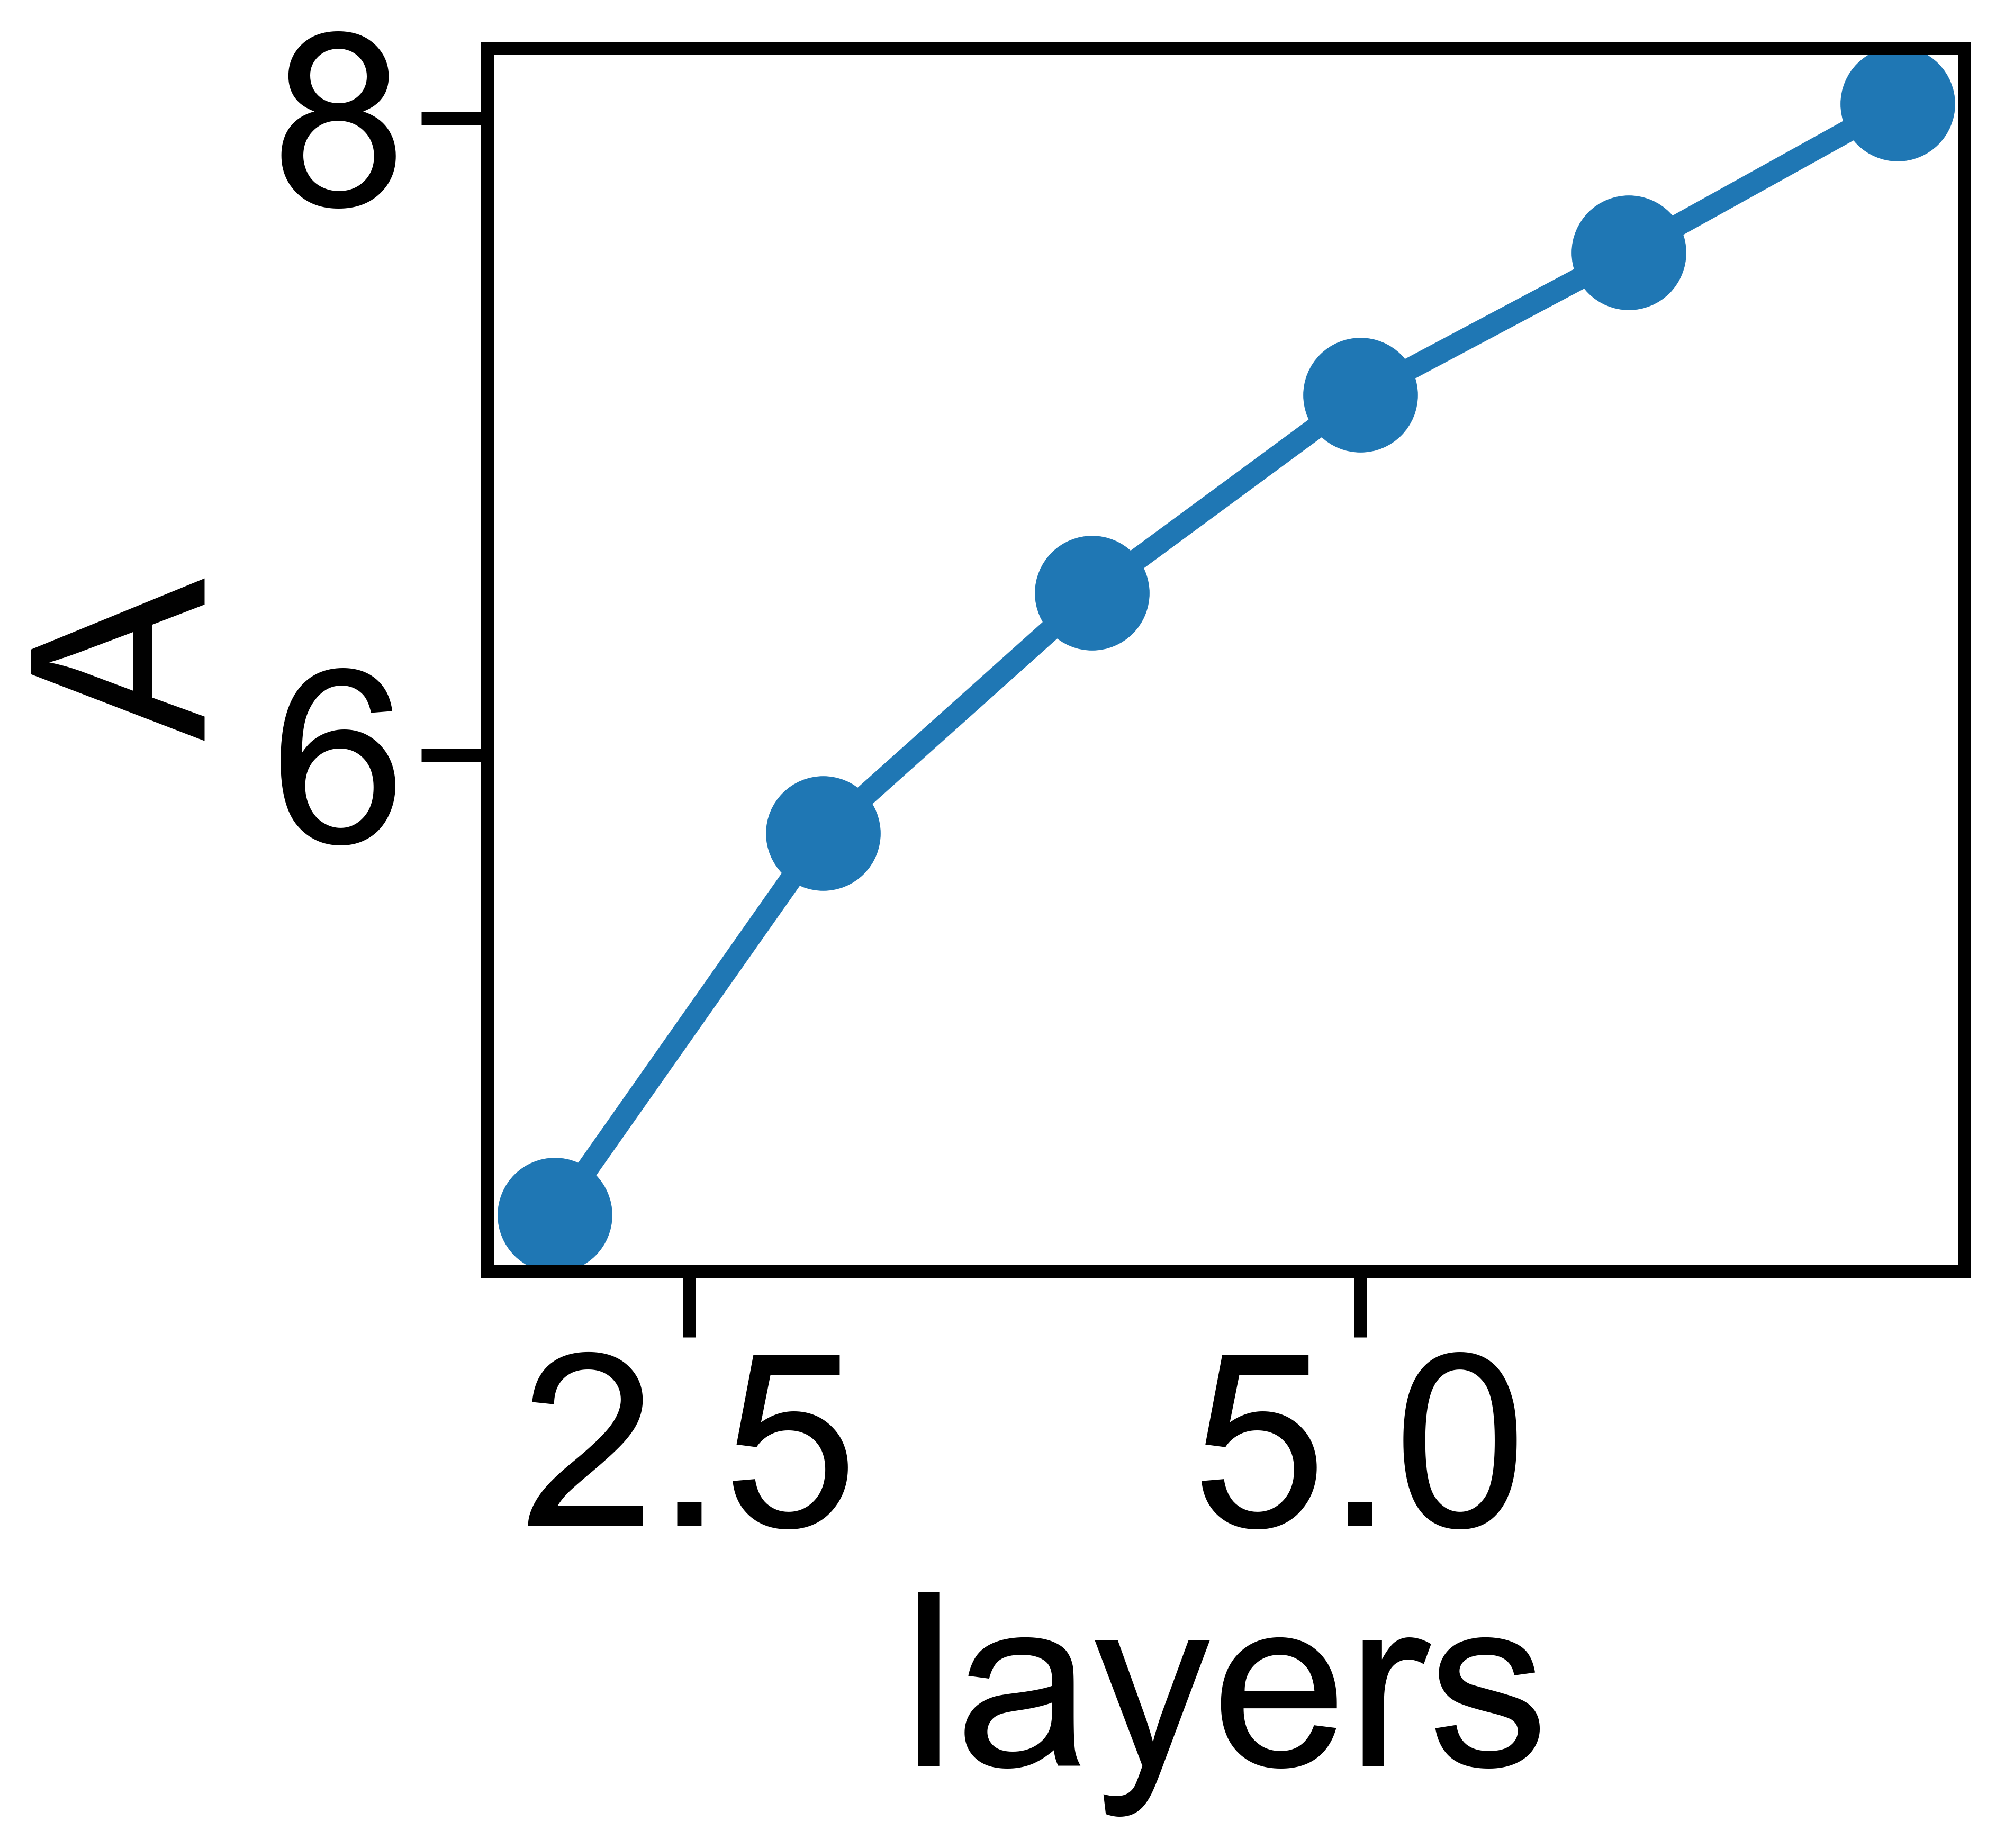

In [13]:
effs = [[0.99468298,4.55468153],
[0.99699753,5.75444606],
[0.99512737,6.50923803],
[0.9970522,7.13011167],
[0.99415213,7.57849051],
[0.99754371,8.04620127]]
As = np.array([x[1] for x in effs])
alphas = np.array([x[0] for x in effs])
layers = [2,3,4,5,6,7]
plt.figure(figsize=(6,5))
plt.plot(layers, As, 'o-')
plt.xlabel('layers')
plt.ylabel('A')